In [1]:
import sys

sys.path.append("..")


In [2]:
from data.dataloader import LowLightDataModule
from model.blocks.lowlightenhancer import LowLightEnhancer
from utils.utils import show_batch, summarize_model


In [3]:
data_module = LowLightDataModule(
    train_dir="../data/1_train",
    valid_dir="../data/2_valid",
    bench_dir="../data/3_bench",
    infer_dir="../data/4_infer",
    image_size=512,
    batch_size=1,
    num_workers=4,
)

data_module.setup()


In [4]:
train_dataloader = data_module.train_dataloader()


torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])


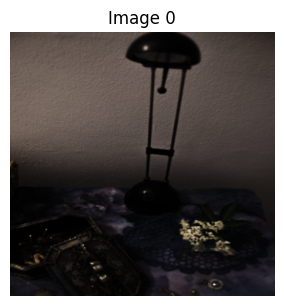

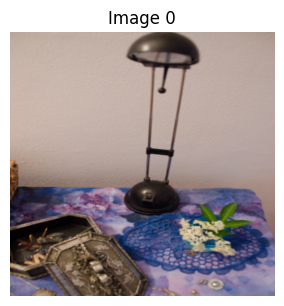

In [5]:
train_low, train_high = next(iter(train_dataloader))
print(train_low.shape)
print(train_high.shape)
show_batch(images=train_low)
show_batch(images=train_high)


In [6]:
lowlightenhancer = LowLightEnhancer(
    embed_dim=32,
    num_heads=8,
    mlp_ratio=4,
    num_resolution=4,
    dropout_ratio=0.2,
    offset=0.5,
    cutoff=0.1,
)


In [7]:
train_low = train_low.cuda()
lowlightenhancer = lowlightenhancer.cuda()


In [8]:
results = lowlightenhancer(train_low)


TypeError: FeatureRestorationBlock.forward() takes 3 positional arguments but 4 were given

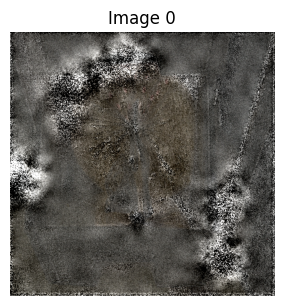

In [ ]:
show_batch(images=results["enhanced"]["rgb"])


In [ ]:
summarize_model(model=lowlightenhancer, input_size=(1, 3, 256, 256))


Layer (type:depth-idx)                        Output Shape              Param #
LowLightEnhancer                              [1, 1, 256, 256]          --
├─ImageDecomposition: 1-1                     [1, 1, 256, 256]          5
│    └─RGB2YCrCbBlock: 2-1                    [1, 1, 256, 256]          1
│    └─HomomorphicSeparationBlock: 2-2        [1, 1, 256, 256]          1
├─FeatureRestorationBlock: 1-2                [1, 1, 256, 256]          --
│    └─DenoisingBlock: 2-3                    [1, 1, 256, 256]          --
│    │    └─DoubleConv: 3-1                   [1, 1, 256, 256]          38,478
│    │    └─DoubleConv: 3-2                   [1, 1, 256, 256]          38,478
│    │    └─DoubleConv: 3-3                   [1, 1, 256, 256]          38,478
│    └─ColorCorrectionBlock: 2-4              [1, 1, 256, 256]          38,478
│    │    └─DoubleConv: 3-4                   [1, 1, 256, 256]          38,478
│    │    └─DoubleConv: 3-5                   [1, 1, 256, 256]          38,478